# Assignment 2
## Logistic Regression

### **<a href='https://docs.google.com/document/d/1dofQkOR1LlnAHttGHWrZ_WdXbuSNWNo9nY1X93ISRkw/edit#heading=h.5ocgcwml12tw'>Guidelines<a/>**

### 1) Importing required libraries

In [2]:
# DO NOT CHANGE, RUN THE CELL AS IT IS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

### 2) Importing and analysing the data

Data contains GRE scores GPA, gender, and race of students along with whether or not they got admitted into a certain school.

In [3]:
# READ DATA
data = pd.read_csv('admit.csv')

In [6]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(400, 5)

In [7]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST FIVE ENTRIES OF THE DATA
data.head(10)

,admit,gre,gpa,gendermale,race
0,0,380,3.61,0,3
1,1,660,3.67,0,2
2,1,800,4.00,0,2
3,1,640,3.19,1,2
4,0,520,2.93,1,2
5,1,760,3.00,1,1
6,1,560,2.98,1,2
7,0,400,3.08,0,2
8,1,540,3.39,1,1
9,0,700,3.92,0,2


In [8]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail()

,admit,gre,gpa,gendermale,race
395,0,620,4.00,0,2
396,0,560,3.04,0,1
397,0,460,2.63,0,2
398,0,700,3.65,1,1
399,0,600,3.89,1,3


In [9]:
# COLLECTING INFO ON THE DATA SET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   admit       400 non-null    int64  
 1   gre         400 non-null    int64  
 2   gpa         400 non-null    float64
 3   gendermale  400 non-null    int64  
 4   race        400 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 15.8 KB


C:\Users\milip\AppData\Local\Temp\ipykernel_123016\4103895010.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


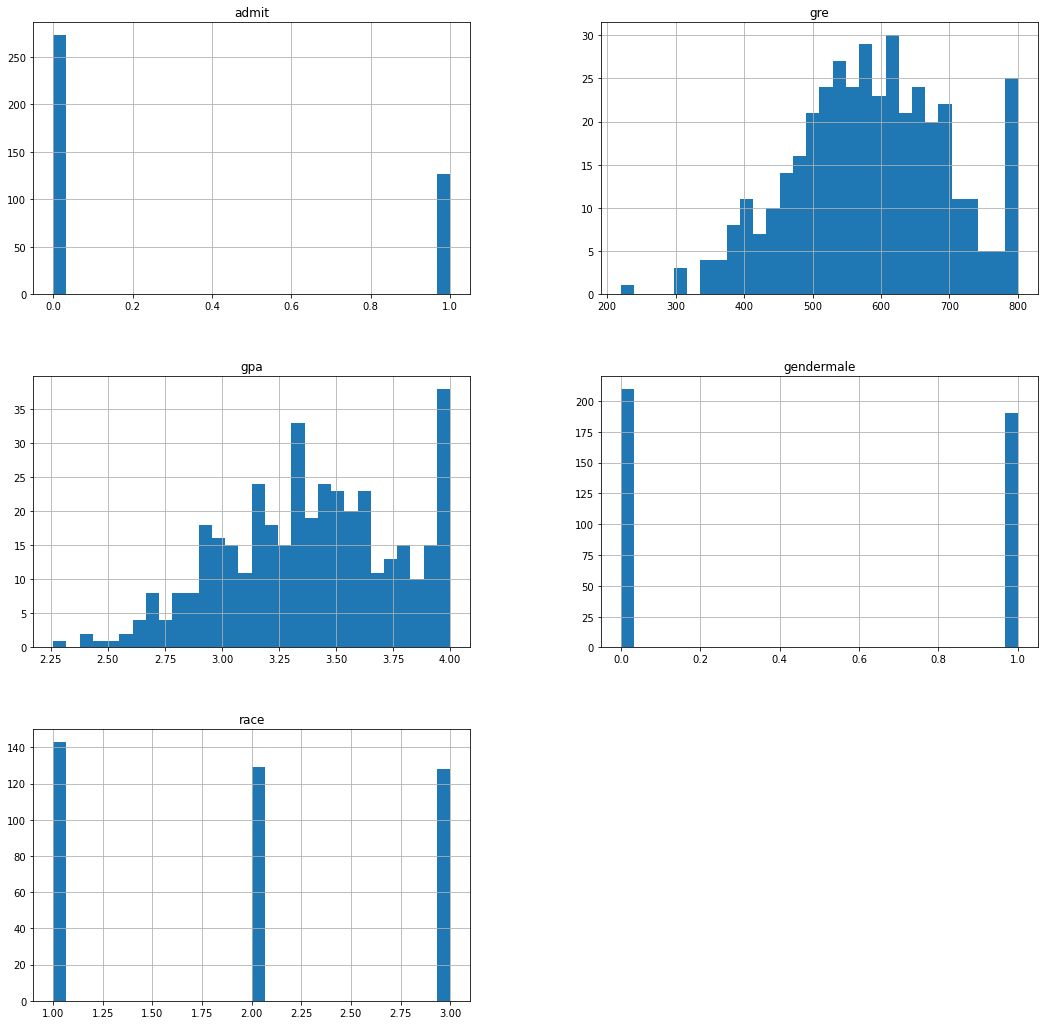

In [10]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES

fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [ ]:
# DESCRIBE THREE OBSERVATIONS FROM THE HISTOGRAMS ABOVE

## About half as many people were accepted than rejected 
## The mode of the GPA was 4.00
## The acceptance rate for the three counted races were about equal

In [11]:
#Summary statistics

data.describe()

,admit,gre,gpa,gendermale,race
count,400.000000,400.000000,400.000000,400.000,400.000000
mean,0.317500,587.700000,3.389900,0.475,1.962500
std,0.466087,115.516536,0.380567,0.500,0.823279
min,0.000000,220.000000,2.260000,0.000,1.000000
25%,0.000000,520.000000,3.130000,0.000,1.000000
50%,0.000000,580.000000,3.395000,0.000,2.000000
75%,1.000000,660.000000,3.670000,1.000,3.000000
max,1.000000,800.000000,4.000000,1.000,3.000000


In [12]:
# CHECKING FOR NULL VALUES

data.isnull().sum()

admit         0
gre           0
gpa           0
gendermale    0
race          0
dtype: int64

In [13]:
# CREATING A COPY TO RETAIN THE NUMERICAL INFORMATION OF THE DATA AS WE CHANGE THE 0 AND 1 TO
# 'NOT ADMITTED' AND 'ADMITTED'

###
data1 = data.copy()
###

In [14]:
# RENAMING THE 0 AND I TO
# 'NOT ADMITTED' AND 'ADMITTED' RESPECTIVELY
data1.loc[:, 'admit'] = data.loc[:, 'admit'].apply(lambda x: 'admitted' if x == 1 else 'not admitted')

In [15]:
data1.head(20)

,admit,gre,gpa,gendermale,race
0,not admitted,380,3.61,0,3
1,admitted,660,3.67,0,2
2,admitted,800,4.00,0,2
3,admitted,640,3.19,1,2
4,not admitted,520,2.93,1,2
5,admitted,760,3.00,1,1
6,admitted,560,2.98,1,2
7,not admitted,400,3.08,0,2
8,admitted,540,3.39,1,1
9,not admitted,700,3.92,0,2


In [16]:
#crosstabs for admit v/s Race

ct = pd.crosstab(data.admit, data.race)
print(ct)

race    1   2   3
admit            
0      90  94  89
1      53  35  39


<AxesSubplot:xlabel='admit', ylabel='value'>

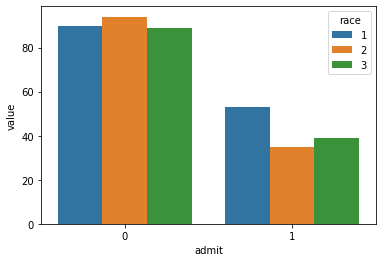

In [17]:
#bar Plot

stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.admit, y=stacked.value, hue=stacked.race)

In [ ]:
# DESCRIBE WHAT YOU UNDERSTAND FROM THE CROSSTABS AND THE BAR GRAPH ABOVE

## The amount of students rejected for all three races were approximately equal 
## There were more students from race 1 accepted into the college than race 2 and race 3
## You can infer that there were a larger quantity of the first race that applied to the college overall than the other two


<AxesSubplot:>

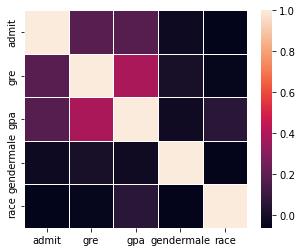

In [18]:
# CORRELATION MATRIX

corr = data.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [ ]:
# DESCRIBE YOUR ANALYSIS OF THE CORRELATION CHART ABOVE

## GPA and GRE have low correlation to admission (0.2)
## GRE and GPA are moderately correlated with each other (0.4)
## Race and admission have little to no correlation with each other (0.1)

In [19]:
# SETTING THE X VALUES AS THE INPUT PARAMETERS
X = data.iloc[:,1:]
# SETTING THE CORRESPONDING Y VALUES AS THE LAST COLUMN WHETHER OR NOT THE STUDENT GOT ADMITTED
y = data.iloc[:,0]

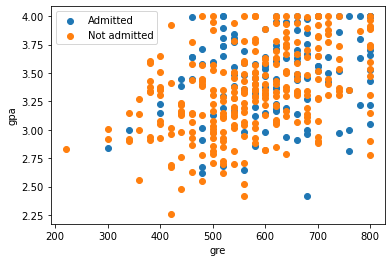

In [20]:
# DO NOT CHANGE ANYTHING, JUST RUN THE CELL
# PLOTTING THE DATA POINTS ON A SCATTER PLOT

mask = y == 1
adm = plt.scatter(X[mask]['gre'].values, X[mask]['gpa'].values)
not_adm = plt.scatter(X[~mask]['gre'].values, X[~mask]['gpa'].values)
plt.xlabel('gre')
plt.ylabel('gpa')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

### 3) Logistic regression for classification
#### Sigmoid Function

>>>>>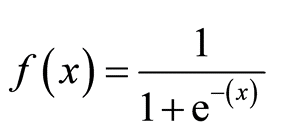

This is the sigmoid function. However big the value of x might be, the functions value always remains between 0 and 1.

In [21]:
# THIS IS THE CODE FOR THE SIGMOID FUNCTION, DO NOT WORRY IF YOU DON'T UNDERSTAND THE CONCEPT COMPLETELY.

def sigmoid(x):
    return (1/(1+np.exp(-x)))

#### Cost function
>>>>>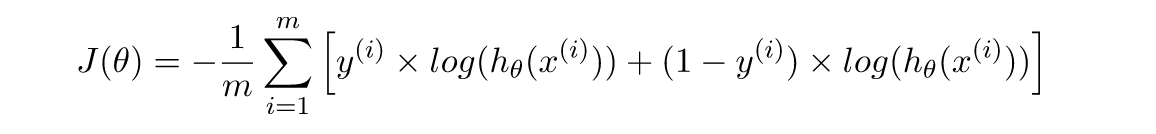

In [22]:
# DO NOT CHANGE, JUST RUN THE CELL
# THIS IS THE CODE IMPLEMENTATION OF THE COST FUNCTION DEFINED FOR LOGISTIC REGRESSION.

def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

#### Updating using gradients
>>>>>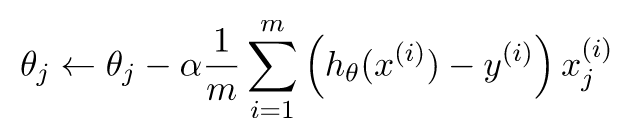

In [23]:
# DO NOT CHANGE, JUST RUN THE CELL
# THIS IS HOW WE UPDATE THE MODEL. THIS IS THE CODE IMPLEMENTATION OF THE GRADIENT USED FOR LOGISTIC REGRESSION.

def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [24]:
# INITIALIZING THE PARAMETERS
# DO NOT CHANGE, JUST RUN THE CELL

(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]

# intializing theta with all zeros
theta = np.zeros((n+1,1))
J = costFunction(theta, X, y)
print(J)

0.6931471805599452


C:\Users\milip\AppData\Local\Temp\ipykernel_123016\209985319.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [25]:
# FINDING THE OPTIMIZED VALUES OF THETA, I.E. THE PARAMETERS

parameters = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))

parameters = parameters[0]
print(parameters)

[-4.61963939e+00  2.61474297e-03  7.89754509e-01 -1.27827590e-01
 -1.77194618e-01]


In [ ]:
# WHAT DO THE PARAMETER VALUES DESCRIBE?

# 1- Admit
# 2- GRE
# 3- GPA
# 4- Gender
# 5- Race

In [26]:
# FINAL VALUE OF COST AFTER OPTIMIZATION

J = costFunction(parameters[:, np.newaxis], X, y)
print(J)

0.5979769688746336


In [27]:
# ACCURACY OF PREDICTION COMPARED TO THE ACTUAL VALUES

def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(X @ theta) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
    
accuracy(X, y.flatten(), parameters, 0.5)

69.25


In [ ]:
### GIVE REASON WHY IS THE ACCURACY OF PREDICTION 69.25% AND NOT 100% AND SUGGEST WAY(S) HOW WE CAN IMPROVE IT.

### The accuracy is off because there are only so many values we can evaluate; we would only get 100% accuracy by 
# evaluating infinite parameters. For example, in the dog image, we are only checking for a few values that will help
# guess that the image is a dog, such as snout, collar, etc. To prevent error, however, we could add more values like
# dog teeth or other dog traits. In reality the amount of possible dog traits is infinite or very large and we must limit
# the amount we use, allowing for error. 

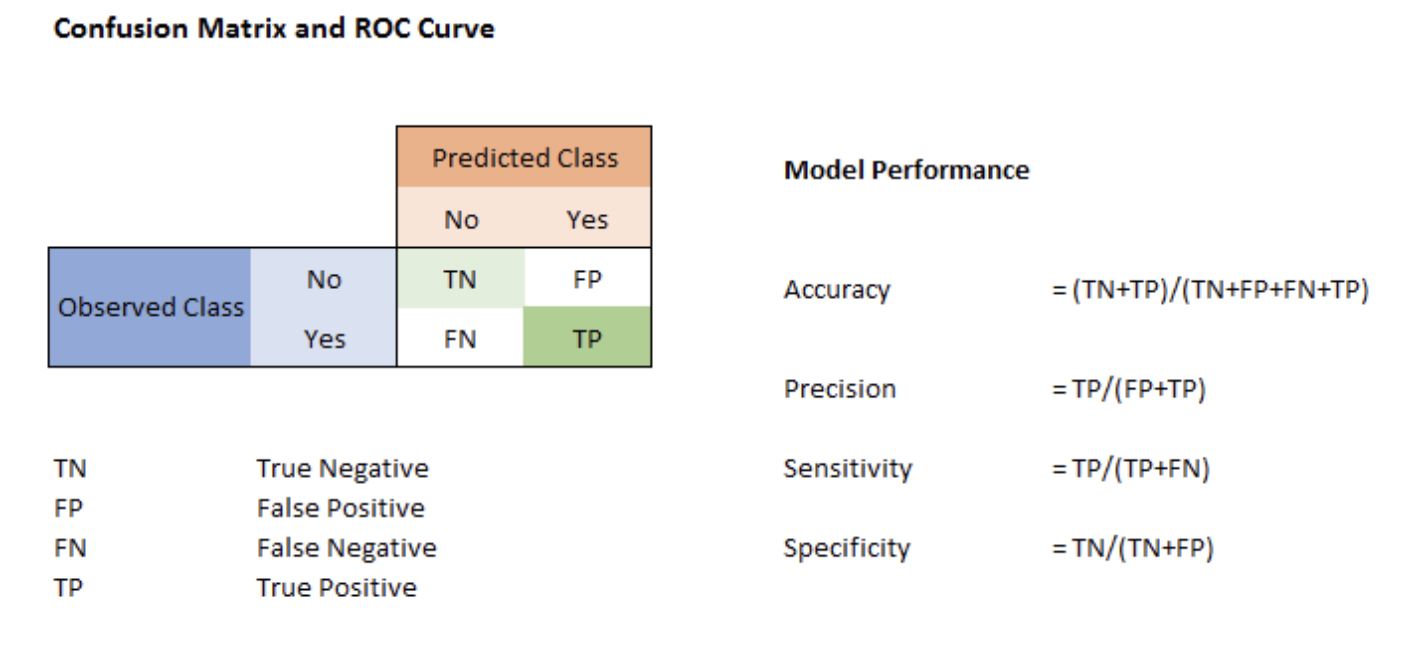

In [28]:
####
threshold = 0.5
####
predictions = []
for item in X:
    if sigmoid(item @ parameters)>= threshold:
        predictions.append(1)
    else:
        predictions.append(0)
        
confusion_matrix(y, predictions)

array([[265,   8],
       [115,  12]], dtype=int64)

In [29]:
# WHAT DOES THE CONFUSION MATRIX REPRESENT?

## It represents the number of true negatives, false positives, false negatives, and true positives. It gives the
## numbers in a 2x2 grid related to the one shown above, correlating 265 with the amount of true negatives and so on. 

# FIND THE ACCURACY, PRECISION, SENSITIVITY AND SPECIFICITY VALUES FOR THE GIVEN THRESHOLD VALUES.
def values(tn, fp, fn, tp):
    print('# Accuracy =', (tn+tp)/(tn+fp+fn+tp))
    print('# Precision =', (tp)/(fp+tp))
    print('# Sensitivity =', (tp)/(tp+fn))
    print('# Specificity =', (tn)/(tn+fp))

values(3, 270, 0, 127)
# threshold = 0.00
# Accuracy = 0.3175
# Precision = 0.3175
# Sensitivity = 1.0
# Specificity = 0.0

# threshold = 0.25
# Accuracy = 0.4975
# Precision = 0.3715277777777778
# Sensitivity = 0.84251968503937
# Specificity = 0.336996336996337

# threshold = 0.45
# Accuracy = 0.6925
# Precision = 0.5416666666666666
# Sensitivity = 0.2047244094488189
# Specificity = 0.9194139194139194

# threshold = 0.55
# Accuracy = 0.6775
# Precision = 0.375
# Sensitivity = 0.023622047244094488
# Specificity = 0.9816849816849816

# threshold = 0.75
# Accuracy = 0.6825
# Precision = undefined
# Sensitivity = 0
# Specificity = 1

# threshold = 0.10
# Accuracy = 0.325
# Precision = 0.3198992443324937
# Sensitivity = 1.0
# Specificity = 0.01098901098901099

# Accuracy = 0.325
# Precision = 0.3198992443324937
# Sensitivity = 1.0
# Specificity = 0.01098901098901099


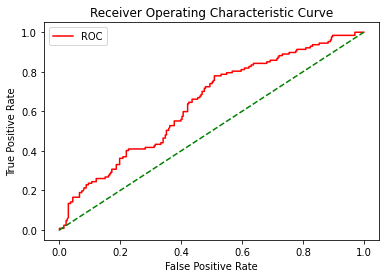

In [30]:
# DO NOT CHANGE, JUST RUN THE CELL

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

predictions = []
for item in X:
    predictions.append(sigmoid(item @ parameters))
fper, tper, thresholds = roc_curve(y, predictions)
plot_roc_curve(fper, tper)

In [ ]:
# WRITE DOWN THREE OBSERVATIONS FROM THE ROC CURVE ABOVE.

## The graph is constantly increasing (positive correlation)
## The ROC curve is above the green line but has the same endpoints
## There seems to be no outliers in the slope of the graph, meaning it is somewhat smooth. This provides some reliable
## accuracy

In [ ]:
# GIVE A REAL LIFE EXAMPLE WHERE LOGISTIC REGRESSION MIGHT BE USEFUL.

## Logistic regression is useful in estimating with accuracy certain machine learning algorithms like the dog. 
## In the doc picture, we used logistic regression to evaluate certain factors and guess if the object is a dog.
## In real life, we can do the same for things like Siri to detect if there is a person in an image, what an image is,
## or even make recommendations from things like Siri based on logistic regression.

#### END OF ASSIGNMENT.